# Area Between Curves and Application to Equality

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.integrate import quad

$$f(x) = \sqrt(x) \quad g(x) = x^2$$

In [9]:
#define the functions and domain


In [ ]:
#examine a plot


In [10]:
#find the area between


In [11]:
#area function


In [12]:
#determine the area


## Many Regions

An example from the 2015 AP CALCULUS AB exam follows:

-----
Let $f$ and $g$ be the functions defined by $f(x) = 1 + x + e^{x^2 - 2x}$ and $g(x) = x^4 - 6.5x^2 + 6x + 2$.  Let $R$ and $S$ be the two regions enclosed by the graphs of $f$ and $g$ shown in the figure below.

a. Find the sum of the areas of regions $R$ and $S$.

----

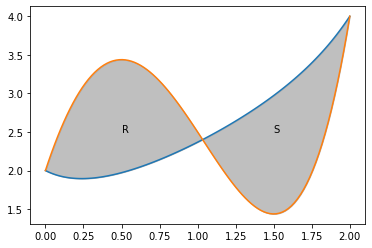

In [15]:
#define the functions
def f(x): return 1 + x + np.e**(x**2 - 2*x)
def g(x): return x**4 - 6.5*x**2 + 6*x + 2
#define domain
x = np.linspace(0, 2, 100)
#plot the regions, fill, add labels
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.fill_between(x, f(x), g(x), color = 'gray', alpha = 0.5)
plt.text(0.5, 2.5, 'R')
plt.text(1.5, 2.5, 'S');

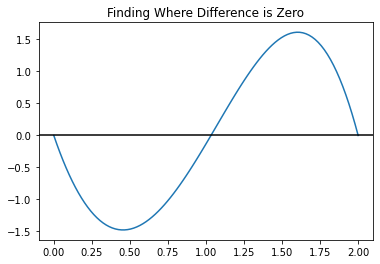

In [34]:
#plot the difference
plt.plot(x, f(x) - g(x))
plt.axhline(color = 'black')
plt.title('Finding Where Difference is Zero');

In [26]:
from scipy.optimize import root_scalar

In [27]:
def difference(x): return f(x) -  g(x)

In [35]:
root_scalar(difference, bracket = [.75, 1.25], method = 'bisect')

      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 38
           root: 1.032831888363944

In [36]:
roots = root_scalar(difference, bracket = [.75, 1.25], method = 'bisect')

In [39]:
roots.root

1.032831888363944

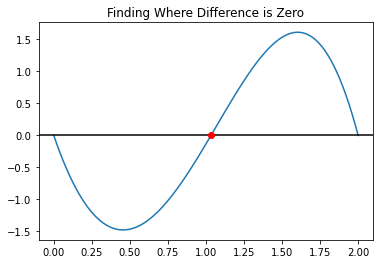

In [42]:
plt.plot(x, f(x) - g(x))
plt.axhline(color = 'black')
plt.title('Finding Where Difference is Zero');
plt.plot(roots.root, difference(roots.root), 'ro');

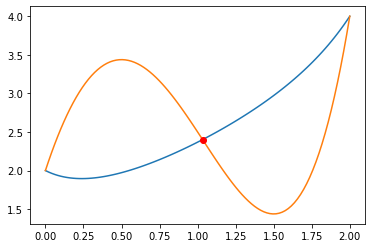

In [45]:
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(roots.root, f(roots.root), 'ro')

In [49]:
def R(x): return g(x) - f(x)
def S(x): return f(x) - g(x)

In [54]:
area_R = quad(R, 0, roots.root)[0]

In [57]:
area_S = quad(S, roots.root, 2)[0]

In [58]:
area_R + area_S

2.0043456631323346

# Wealth Distribution and Baseball



![](images/baseballs.png)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [ ]:
#urls
url = 'https://www.usatoday.com/sports/mlb/salaries/'

In [ ]:
#
df = pd.read_html(url)[0]#gives me the first table from the page
df.head()

In [ ]:
df['Salary'] = df['Salary'].str.replace('$','').str.replace(',','').astype(float)

In [ ]:
df['Salary'].hist()

## Looking at Percentiles

As we saw in class, here we want to look at different distributions according to quartiles or chunks of roughly 20% of the data in order.  To do so we will sort our salaries and break them into 5 roughly even sized groups. 

In [ ]:
#sort the data
df['Salary'].sort_values()

In [ ]:
sorted_salaries = df['Salary'].sort_values()

In [ ]:
877/5

In [ ]:
#build the groups
first_quartile = sorted_salaries[:175].sum()/sorted_salaries.sum()

second_quartile = sorted_salaries[:350].sum()/sorted_salaries.sum()

third_quartile = sorted_salaries[:525].sum()/sorted_salaries.sum()

fourth_quartile = sorted_salaries[:700].sum()/sorted_salaries.sum()

fifth_quartile = sorted_salaries.sum()/sorted_salaries.sum()

In [ ]:
points = [0, first_quartile, second_quartile, third_quartile, fourth_quartile, fifth_quartile]
x = [0, .2, .4, .6, .8, 1.0]

In [ ]:
points

In [ ]:
plt.plot(x, points, '--o')
plt.plot(x, x, '--o');
plt.title('Wealth Distribution in Baseball Salaries');

## Fitting the polynomial

As we discussed in class, we would like a description of a function through the given points.  This way, we can use our definite integral to find the area.  We use `numpy` to determine this polynomial, and play around with the complexity until we get a good fit.

In [ ]:
coefs = np.polyfit(x, points, 4)

In [ ]:
coefs

In [ ]:
#shortcut to evaluate the polynomial
np.polyval(coefs, x)

In [ ]:
#plotting
plt.plot(x, np.polyval(coefs, x), '--v', label = 'approximation')
plt.plot(x, points, '--o', label = 'data')
plt.plot(x, x, color = 'black')
plt.legend();
plt.title('Fitted Curve against Data');

In [ ]:
np.round(coefs, decimals = 3)

We will use a simpler version of the polynomial and check that it is a reasonable approximation:

$$f(x) = 3.73x^4 - 4.4x^3 + 1.769x^2 - .103x$$

In [ ]:
def L(x):
    return 3.73*x**4 - 4.4*x**3 + 1.769*x**2 - .103*x 

In [ ]:
def E(x): return x

In [ ]:
x = np.array(x)

In [ ]:
plt.plot(x, L(x), '--o')
plt.plot(x, points);

## Gini Index

We have a line of inequality $y = x$ and the Lorenz curve $f(x)$.  The Gini Index is given by:

$$G = 2\int_0^1 x - f(x) ~ dx$$

In [ ]:
plt.plot(x, L(x), '--o', label = 'Lorenz')
plt.plot(x, E(x), color = 'black', label = 'Equality');
plt.fill_between(x, L(x), E(x), color = 'gray', alpha = 0.6)
plt.fill_between(x, L(x), color = 'lightblue', alpha = 0.6)
plt.text(0.4, 0.2, 'A1', size = 16)
plt.text(0.8, 0.1, 'A2', size = 16)
plt.legend();

## Evaluating the Integral

In [ ]:
from scipy.integrate import quad

In [ ]:
def a1(x):
    return E(x) - L(x)

In [ ]:
quad(a1, 0, 1)[0]

In [ ]:
2*quad(a1, 0, 1)[0]

### Example 2: NYC Salary Data

The data below comes from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e). 

-----

*Data is collected because of public interest in how the City’s budget is being spent on salary and overtime pay for all municipal employees. Data is input into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents the following statistics for every city employee: Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (i.e. lump sum and/or retro payments). This data can be used to analyze how the City's financial resources are allocated and how much of the City's budget is being devoted to overtime. The reader of this data should be aware that increments of salary increases received over the course of any one fiscal year will not be reflected. All that is captured, is the employee's final base and gross salary at the end of the fiscal year*

-----

In [ ]:
#!pip install sodapy

In [ ]:
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

results = client.get("k397-673e", limit=10000)


last_year_salaries = pd.DataFrame.from_records(results)

In [ ]:
last_year_salaries['fiscal_year'].describe()

In [ ]:
last_year_salaries[last_year_salaries['fiscal_year'] == '2020'].shape

In [ ]:
last_year_salaries = last_year_salaries[last_year_salaries['fiscal_year'] == '2020']

In [ ]:
last_year_salaries.info()

In [ ]:
last_year_salaries.head(2)

In [ ]:
last_year_salaries['base_salary'] = last_year_salaries['base_salary'].astype('float')

In [ ]:
plt.hist(last_year_salaries['base_salary'], bins = 30, alpha = 0.4, edgecolor = 'black');